# Cyberbullying Detection using NLP 

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
tweet_data = pd.read_csv('../dataset/twitter_parsed_dataset.csv')

In [3]:
tweet_data.sample(5)

,index,id,Text,Annotation,oh_label
8522,5.72329101580624E+017,5.72329101580624E+017,Deconstructed anything is just a lazy way to m...,none,0.0
15114,5.73506992003682E+017,5.73506992003682E+017,RT @AshoorB1: Not sexist but womem and sport a...,sexism,1.0
9808,5.74395614764491E+017,5.74395614764491E+017,"@LynnMagic this is awesome, and I love this.",none,0.0
14580,5.75992267120357E+017,5.75992267120357E+017,Kat &amp; Andre would be the type of people th...,none,0.0
8567,4.74711657914978E+017,4.74711657914978E+017,RT @Jepattybun I'm not sexist but every Pokemo...,sexism,1.0


In [4]:
tweet_data["Annotation"].value_counts()

Annotation
none      11501
sexism     3377
racism     1970
Name: count, dtype: int64

In [5]:
tweet_data['oh_label'].value_counts()

oh_label
0.0    11501
1.0     5347
Name: count, dtype: int64

In [7]:
tweet_data.dtypes

index          object
id             object
Text           object
Annotation     object
oh_label      float64
dtype: object

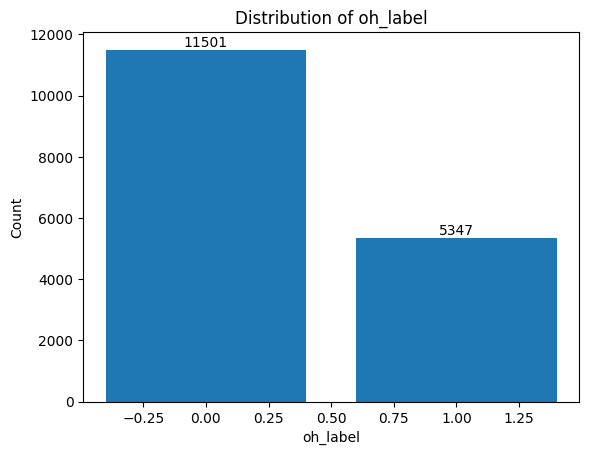

In [8]:
# Assuming your DataFrame is named 'tweet_data' and the target column is 'oh_label'
counts = tweet_data['oh_label'].value_counts()

# Create a bar plot
plt.bar(counts.index, counts.values)

# Adding labels and title
plt.xlabel('oh_label')
plt.ylabel('Count')
plt.title('Distribution of oh_label')

# Adding annotations for each bar (optional)
for i, count in enumerate(counts.values):
    plt.text(i, count + 100, str(count), ha='center')

# Show the plot
plt.show()

In [10]:
texts = tweet_data['Text'].astype(str)

In [11]:
# Tokenizing words using Keras Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [12]:
# Word frequencies
word_index = tokenizer.word_index
word_freq = {}
for word, idx in word_index.items():
    word_freq[word] = sequences.count(idx)

top_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:20]

In [14]:
# Character lengths
char_lengths = tweet_data['Text'].astype(str).apply(len)

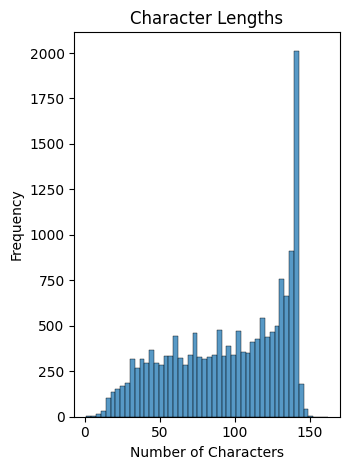

In [18]:
# Plot character lengths
plt.subplot(1, 2, 2)
sns.histplot(char_lengths, bins=50)
plt.title('Character Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [19]:
# Displaying top 20 words and their frequencies
print("Top 20 Words:")
for idx, (word, freq) in enumerate(top_words, 1):
    print(f"{idx}. {word}: {freq} times")

Top 20 Words:
1. the: 0 times
2. to: 0 times
3. mkr: 0 times
4. a: 0 times
5. i: 0 times
6. and: 0 times
7. is: 0 times
8. of: 0 times
9. rt: 0 times
10. you: 0 times
11. that: 0 times
12. t: 0 times
13. in: 0 times
14. http: 0 times
15. co: 0 times
16. not: 0 times
17. are: 0 times
18. it: 0 times
19. but: 0 times
20. for: 0 times


---

### Handeling Missing Values

In [5]:
tweet_data.isna().sum()


index         0
id            1
Text          1
Annotation    3
oh_label      3
dtype: int64

In [6]:
missing_rows = tweet_data[tweet_data.isnull().any(axis=1)]
missing_rows

,index,id,Text,Annotation,oh_label
2992,5.67909969783169E+017,5.67909969783169E+017,RT @Lizzethismetal: Probably gonna piss off so...,NaN,NaN
2993,#yesallmen,NaN,NaN,NaN,NaN
2994,@MT8_9 http://t.co/QHo6dhumjc,sexism,1,NaN,NaN


In [7]:
tweet_data.dropna(subset=['Text', 'Annotation', 'oh_label'], how='all', inplace=True)

# Confirm the changes
print("Rows with NaN in 'text', 'annotations', or 'oh_label' dropped.")

Rows with NaN in 'text', 'annotations', or 'oh_label' dropped.


In [8]:
tweet_data[tweet_data.isnull().any(axis=1)]

,index,id,Text,Annotation,oh_label
2992,5.67909969783169E+017,5.67909969783169E+017,RT @Lizzethismetal: Probably gonna piss off so...,NaN,NaN
2994,@MT8_9 http://t.co/QHo6dhumjc,sexism,1,NaN,NaN


In [9]:
tweet_data = tweet_data[tweet_data['id'] != 'sexism'] # drop rows where 'id' is "sexism"

In [10]:
tweet_data.iloc[2992].Text

'RT @Lizzethismetal: Probably gonna piss off some #feminists'

In [11]:
tweet_data.loc[2992, 'Annotation'] = 'none'
tweet_data.loc[2992, 'oh_label'] = 0.0
tweet_data.iloc[2992]

index                                     5.67909969783169E+017
id                                        5.67909969783169E+017
Text          RT @Lizzethismetal: Probably gonna piss off so...
Annotation                                                 none
oh_label                                                    0.0
Name: 2992, dtype: object

In [12]:
tweet_data[tweet_data.isnull().any(axis=1)]

,index,id,Text,Annotation,oh_label


In [13]:
tweet_data.isna().sum()

index         0
id            0
Text          0
Annotation    0
oh_label      0
dtype: int64

---

In [13]:
tweet_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 16849 entries, 0 to 16850
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       16849 non-null  object 
 1   id          16849 non-null  object 
 2   Text        16849 non-null  object 
 3   Annotation  16849 non-null  object 
 4   oh_label    16849 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.3+ MB


In [14]:
tweet_data.describe().T

,count,mean,std,min,25%,50%,75%,max
oh_label,16849.0,0.317348,0.465458,0.0,0.0,0.0,1.0,1.0


We'll Drop index , id column ... 

In [14]:
tweet_data.drop(['id',"index"], axis=1, inplace=True)

In [15]:
tweet_data.shape

(16849, 3)

In [16]:
tweet_data.reset_index(drop=True, inplace=True)

---

---

## To Capture the Annotations (sexism, racisim) we will add another class for oh_label !

In [17]:
modified_data = tweet_data.copy()
label_map = {'none': 0, 'sexism': 1, 'racism': 2}
modified_data['new_oh_label'] = modified_data['Annotation'].map(label_map)

In [18]:
modified_data[0:10]

,Text,Annotation,oh_label,new_oh_label
0,@halalflaws @biebervalue @greenlinerzjm I read...,none,0.0,0
1,@ShreyaBafna3 Now you idiots claim that people...,none,0.0,0
2,"RT @Mooseoftorment Call me sexist, but when I ...",sexism,1.0,1
3,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",racism,1.0,2
4,#mkr No No No No No No,none,0.0,0
5,RT @TRobinsonNewEra: http://t.co/nkkCbpcHEo Sa...,none,0.0,0
6,RT @Millhouse66 @Maureen_JS nooo not sexist bu...,sexism,1.0,1
7,Going to make some pancakes.....Don't hve any ...,none,0.0,0
8,RT @ahtweet: @freebsdgirl How dare you have fe...,none,0.0,0
9,RT @Newmanzaa: There's something wrong when a ...,sexism,1.0,1


---

---

### Splitting Data


In [19]:
X = modified_data.drop(['new_oh_label'], axis=1)
y = modified_data['new_oh_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13479, 3), (3370, 3), (13479,), (3370,))

---

### Preprocessing

In [25]:
X_train.sample(5)

,Text,Annotation,oh_label
4712,I've just realised that Annie reminds me of on...,none,0.0
11728,RT @MetaCookbook: Ok. I'm gonna chill a bit lo...,none,0.0
684,Rob and Dave better win this! Bacon! #mkr,none,0.0
7887,Deconstructed is a synonym for smears of mess ...,none,0.0
15457,"@UseUrTongue You need serious help, Gags. I h...",sexism,1.0


In [21]:
X_train.drop(['Annotation','oh_label'], axis=1, inplace=True)

In [28]:
textsamples = X_train.Text[0:10].to_list()
textsamples

['HEE HEE HEEEEEEE',
 'Words were said. The gaters protested "free speech!" - alas, speech may be free, but not of consequences.',
 'Fuck me,  this show will still be running at Christmas #mkr',
 "Did they drug Colin's serving or...? #mkr",
 'RT @MaguidhirP: @Juliet777777 @GROGParty Socialists and Moslems - working together to destroy Australia.',
 'So fucking proud of Zoe right now. And it is so weird being part of an entourage :P',
 'the puppy is trying to hump leo and leo is just like "EXCUSE ME" and now i have a 60 lb lapdog.',
 "@sajid_fairooz @IsraeliRegime So don't feed me your little piece of taqiyya BS.",
 '@rfrankh53 @BilalIGhumman @98Halima @johnnygjokaj @cdnKhadija Here is bigotry. http://t.co/7IH6t729fn',
 '@TheGags29 You make many baseless assumptions and decide they are facts.']

---

### My Approach : <b> Remove the `RT` , `@usernames` , `links` from the tweets </b>

---

Following is the logic that will be used to process tweets .... this is done with purpose to reduce vocabulary size and to remove noise from the tweets

In [22]:
import re

# Example tweet text
tweet_text = "'@halalflaws @biebervalue @greenlinerzjm I read them in context.No change in meaning. The history of Islamic slavery. https://t.co/xWJzpSodGj'"
print(tweet_text)
# Remove RT
tweet_text = re.sub(r'^RT[\s]+', '', tweet_text)

# Replace @usernames with a placeholder
tweet_text = re.sub(r'@([A-Za-z0-9_]+)', '<some_username>', tweet_text)

# Replace links with a placeholder
tweet_text = re.sub(r'https?://\S+', '<link_to_website>', tweet_text)

print(tweet_text)



'@halalflaws @biebervalue @greenlinerzjm I read them in context.No change in meaning. The history of Islamic slavery. https://t.co/xWJzpSodGj'
'<some_username> <some_username> <some_username> I read them in context.No change in meaning. The history of Islamic slavery. <link_to_website>


In [23]:
# Example tweet text
tweet_text = "RT @TRobinsonNewEra: http://t.co/nkkCbpcHEo Saudi preacher who 'raped and tortured' his five -year-old daughter to death is released after …"
print(tweet_text)
# Remove RT
tweet_text = re.sub(r'^RT[\s]+', '', tweet_text)

# Replace @usernames with a placeholder
tweet_text = re.sub(r'@([A-Za-z0-9_]+)', '<some_username>', tweet_text)

# Replace links with a placeholder
tweet_text = re.sub(r'https?://\S+', '<link_to_website>', tweet_text)

print(tweet_text)

RT @TRobinsonNewEra: http://t.co/nkkCbpcHEo Saudi preacher who 'raped and tortured' his five -year-old daughter to death is released after …
<some_username>: <link_to_website> Saudi preacher who 'raped and tortured' his five -year-old daughter to death is released after …


---

In [24]:
# Remove RT, replace @usernames and links with placeholders in the 'Text' column
X_train['Text'] = X_train['Text'].apply(lambda x: re.sub(r'^RT[\s]+', '', x))
X_train['Text'] = X_train['Text'].apply(lambda x: re.sub(r'@([A-Za-z0-9_]+)', '<some_username>', x))
X_train['Text'] = X_train['Text'].apply(lambda x: re.sub(r'https?://\S+', '<link_to_website>', x))


In [25]:
X_test['Text'] = X_test['Text'].apply(lambda x: re.sub(r'^RT[\s]+', '', x))
X_test['Text'] = X_test['Text'].apply(lambda x: re.sub(r'@([A-Za-z0-9_]+)', '<some_username>', x))
X_test['Text'] = X_test['Text'].apply(lambda x: re.sub(r'https?://\S+', '<link_to_website>', x))

---

In [26]:
textsamples = X_train.Text[0:10].to_list()
textsamples

['HEE HEE HEEEEEEE',
 'Words were said. The gaters protested "free speech!" - alas, speech may be free, but not of consequences.',
 'Fuck me,  this show will still be running at Christmas #mkr',
 "Did they drug Colin's serving or...? #mkr",
 '<some_username>: <some_username> <some_username> Socialists and Moslems - working together to destroy Australia.',
 'So fucking proud of Zoe right now. And it is so weird being part of an entourage :P',
 'the puppy is trying to hump leo and leo is just like "EXCUSE ME" and now i have a 60 lb lapdog.',
 "<some_username> <some_username> So don't feed me your little piece of taqiyya BS.",
 '<some_username> <some_username> <some_username> <some_username> <some_username> Here is bigotry. <link_to_website>',
 '<some_username> You make many baseless assumptions and decide they are facts.']

Looks good to be `Tokenized` !

WE are Tokenizing the Train and Test Data Separately because we don't want to leak the information from test data to train data

In [27]:
train_tweets = X_train['Text'].to_list()

test_tweets = X_test['Text'].to_list()

In [28]:
len(train_tweets), len(test_tweets)

(13479, 3370)

In [29]:
# WE can experiment with different values of num_words or keep it None
vocab_size = 5000
max_length = 55 # max length of each tweet in words ⭐⭐⭐
trunc_type='post'
padding_type='post'
oov_tok = "<UNK>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok) 
tokenizer.fit_on_texts(train_tweets) # fit tokenizer on our training text data only!

word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_tweets)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_tweets)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [42]:
print(train_padded[0])
print(train_padded.shape)

[3559 3559    1    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0]
(13479, 55)


In [43]:
print(test_padded[0])
print(test_padded.shape)

[ 875   10  854 2111    4  182  263   13    1  122 1484  187    6    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0]
(3370, 55)


---

### Model Building

In [40]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 32, input_length=max_length), # here 32 is embedding_dim # DIRECTION OF THE WORD WILL BE LEARNED EPOCH BY EPOCH
    tf.keras.layers.GlobalAveragePooling1D(),                                                      # ADDDING UP THE VECTORS 
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [47]:
num_epochs = 30

history = model.fit(train_padded, y_train, epochs=num_epochs, validation_data=(test_padded, y_test), verbose=2)

Epoch 1/30
422/422 - 1s - loss: 0.1580 - accuracy: 0.9427 - val_loss: 0.6347 - val_accuracy: 0.8136 - 1s/epoch - 3ms/step
Epoch 2/30
422/422 - 1s - loss: 0.1479 - accuracy: 0.9465 - val_loss: 0.6462 - val_accuracy: 0.8092 - 1s/epoch - 3ms/step
Epoch 3/30
422/422 - 1s - loss: 0.1363 - accuracy: 0.9543 - val_loss: 0.7118 - val_accuracy: 0.8071 - 1s/epoch - 3ms/step
Epoch 4/30
422/422 - 1s - loss: 0.1319 - accuracy: 0.9547 - val_loss: 0.7367 - val_accuracy: 0.7985 - 1s/epoch - 3ms/step
Epoch 5/30
422/422 - 1s - loss: 0.1228 - accuracy: 0.9577 - val_loss: 0.7683 - val_accuracy: 0.8039 - 1s/epoch - 3ms/step
Epoch 6/30
422/422 - 1s - loss: 0.1149 - accuracy: 0.9613 - val_loss: 0.8160 - val_accuracy: 0.7884 - 1s/epoch - 3ms/step
Epoch 7/30
422/422 - 1s - loss: 0.1129 - accuracy: 0.9623 - val_loss: 0.8371 - val_accuracy: 0.7976 - 1s/epoch - 3ms/step
Epoch 8/30
422/422 - 1s - loss: 0.1038 - accuracy: 0.9655 - val_loss: 0.9106 - val_accuracy: 0.7920 - 1s/epoch - 3ms/step
Epoch 9/30
422/422 - 1s 

In [48]:
model.predict(test_padded)

106/106 [==============================] - 0s 1ms/step


array([[1.0000000e+00, 2.9763678e-08, 1.7145891e-22],
       [9.9995899e-01, 4.0990784e-05, 2.2716090e-16],
       [1.5074335e-02, 9.8492569e-01, 6.2303683e-13],
       ...,
       [9.8730528e-01, 1.2694563e-02, 9.6490197e-08],
       [9.9743903e-01, 2.5609659e-03, 2.9990964e-16],
       [9.9988365e-01, 1.1628002e-04, 1.5914410e-22]], dtype=float32)

In [50]:
from sklearn.metrics import f1_score

predicted_probabilities = model.predict(test_padded)

# Convert probabilities to class labels
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Calculate F1-score
f1score = f1_score(y_test, predicted_labels, average='macro')  

print("F1-score:", f1score)

  1/106 [..............................] - ETA: 3s

106/106 [==============================] - 0s 2ms/step
F1-score: 0.7013478139395249


## Got F1-Score of `0.70` on Test Data ⭐⭐⭐

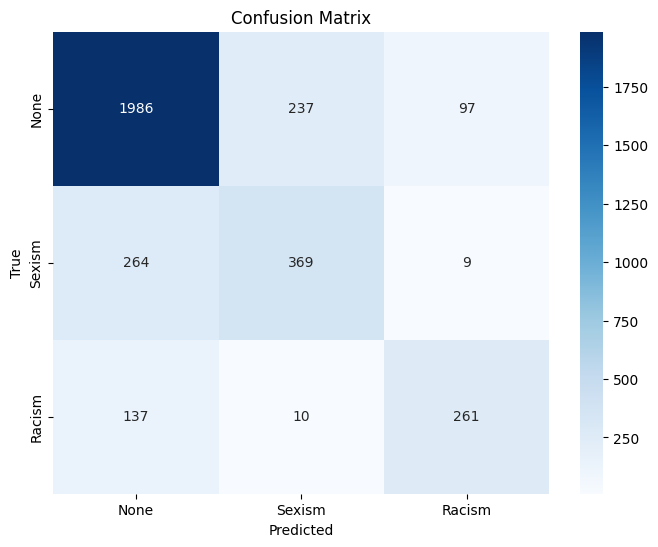

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming true_labels and predicted_labels are available from your model predictions
# Replace these with your true and predicted labels

# Compute confusion matrix
cm = confusion_matrix(y_test, predicted_labels)

# Define class labels (if not provided earlier)
class_names = ['None', 'Sexism', 'Racism']  # Replace with your class names

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [52]:
model.save('tweet_bully_detector.h5')

---

In [47]:
from tensorflow import keras

In [52]:
model = keras.models.load_model('tweet_bully_detector.h5')

### Explainable AI

In [54]:
import shap

In [55]:
shap.initjs()

In [60]:
samples = train_padded[:100]

In [66]:
explainer = shap.DeepExplainer(model, samples.reshape(1,-1))
shap_values = explainer.shap_values(test_padded.reshape(1,-1)[:10])

ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 55), found shape=(1, 5500)